Part III: Building a CNN

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adadelta

In [4]:
from keras.datasets import fashion_mnist
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
trainX.shape

(60000, 28, 28)

In [7]:
trainy.shape

(60000,)

Text(0.5, 1.0, 'Distribution of different classes in the fashion MNIST dataset')

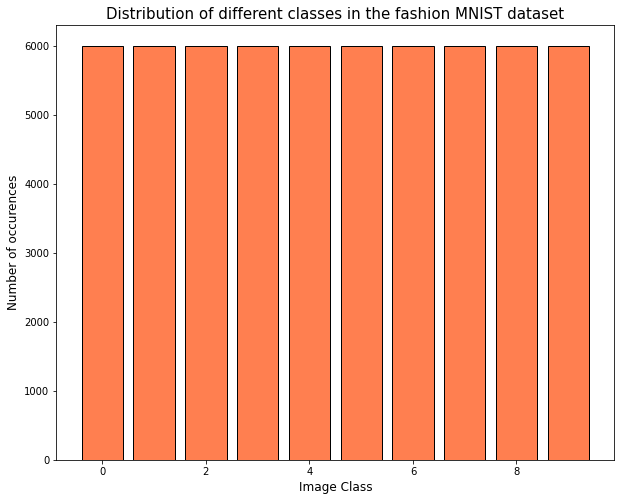

In [6]:
plt.figure(figsize = (10, 8))
plt.bar(np.unique(trainy), np.bincount(trainy), color = 'coral', edgecolor = 'black')
plt.xlabel('Image Class', fontsize = 12)
plt.ylabel('Number of occurences', fontsize = 12)
plt.title('Distribution of different classes in the fashion MNIST dataset', fontsize = 15)

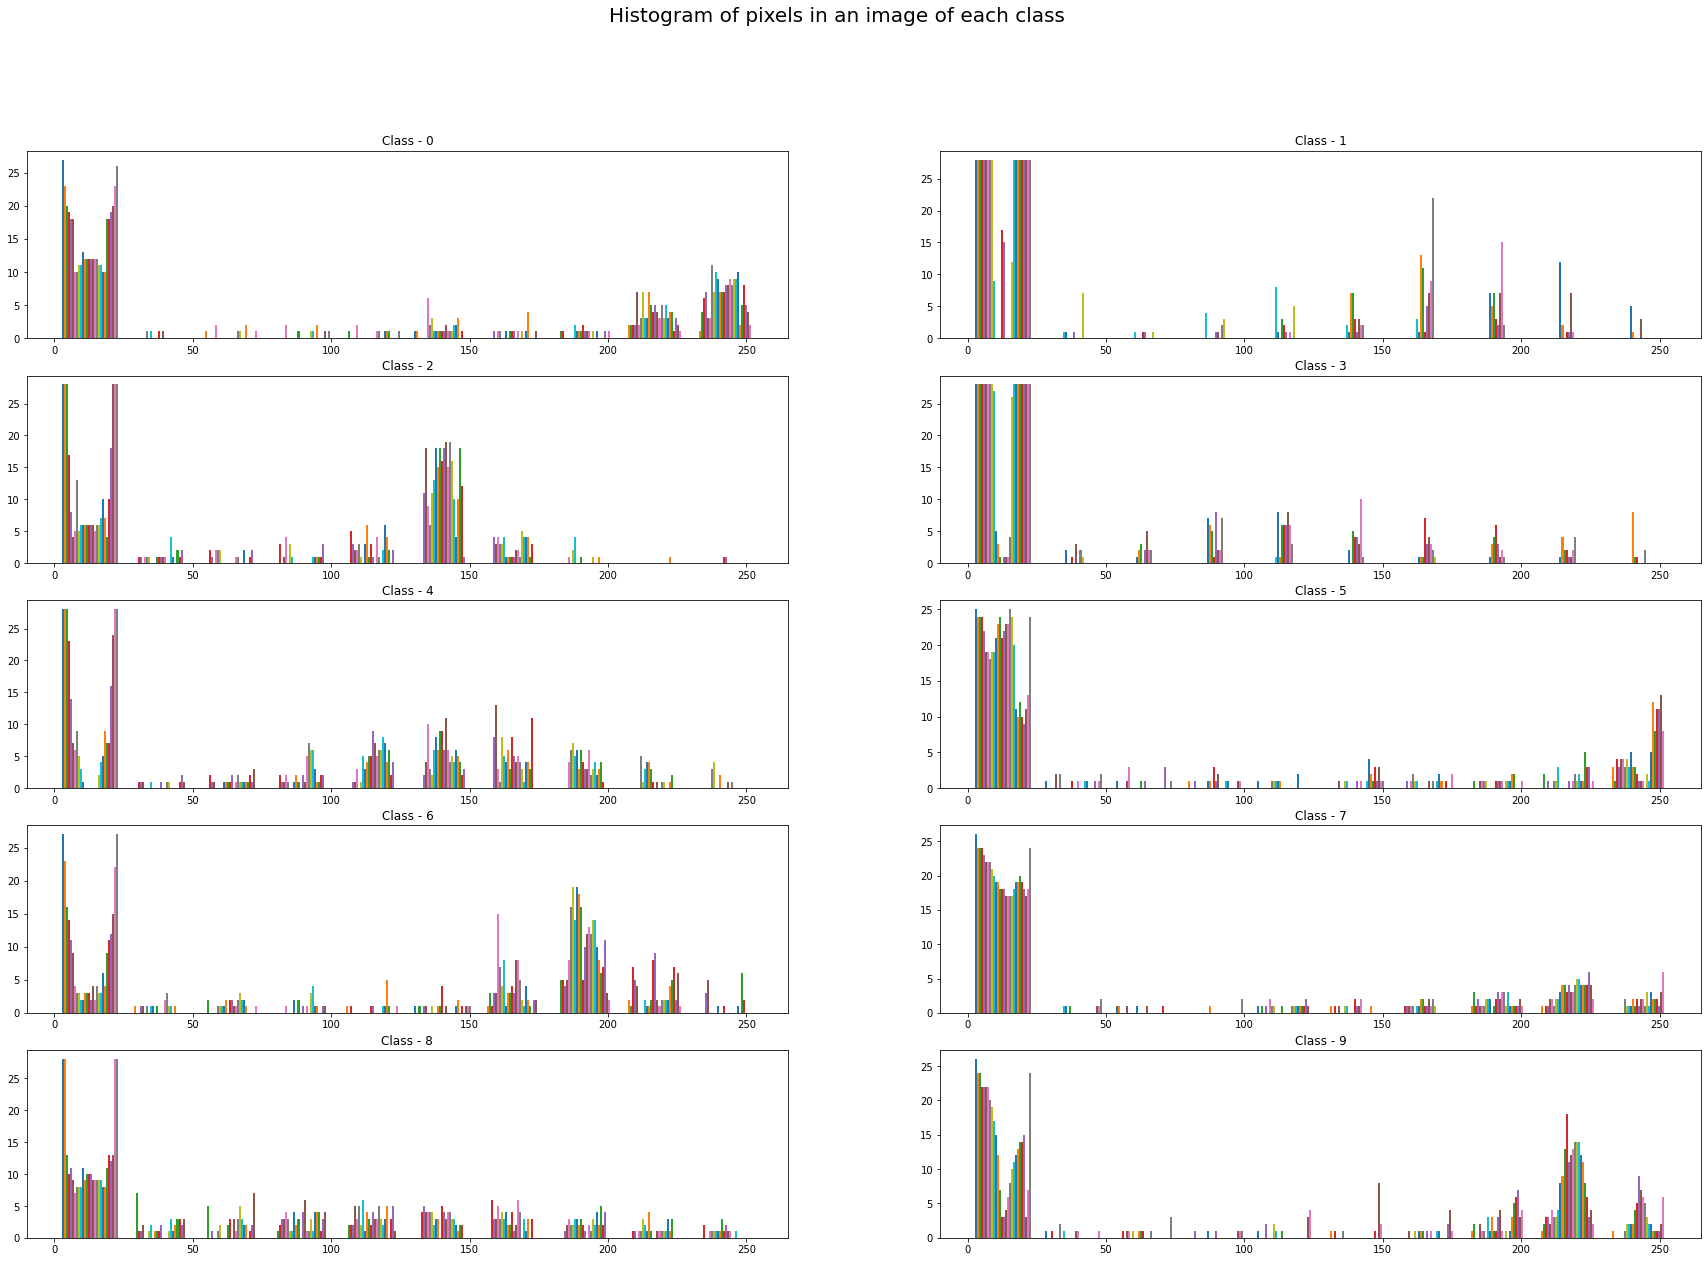

In [8]:
fig, axs = plt.subplots(5, 2, figsize = (30, 20))
fig.suptitle('Histogram of pixels in an image of each class', fontsize=20)
row_count = 0
col_count = 0

for i in np.unique(trainy):
  idx = np.random.choice(np.where(trainy == i)[0])
  axs[row_count, col_count].hist(trainX[idx])
  axs[row_count, col_count].set_title('Class - ' + str(i))

  col_count += 1
  if col_count > 1:
    row_count += 1
    col_count = 0

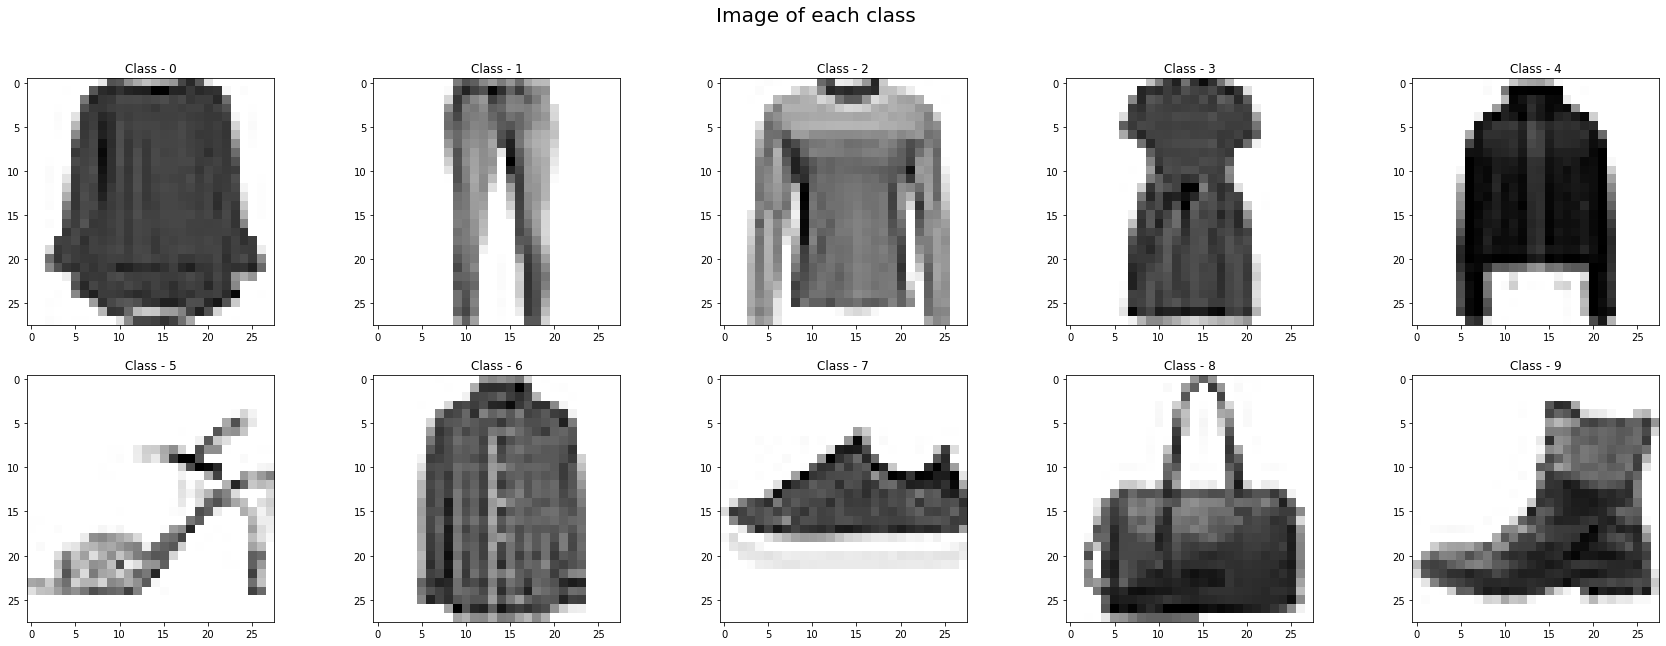

In [9]:
fig, axs = plt.subplots(2, 5, figsize = (30, 10))
fig.suptitle('Image of each class', fontsize=20)
row_count = 0
col_count = 0

for i in np.unique(trainy):
  idx = np.random.choice(np.where(trainy == i)[0])
  axs[row_count, col_count].imshow(trainX[idx], cmap=plt.cm.binary)
  axs[row_count, col_count].set_title('Class - ' + str(i))

  col_count += 1
  if col_count > 4:
    row_count += 1
    col_count = 0

In [10]:
trainX = trainX.reshape(trainX.shape[0],trainX.shape[1],trainX.shape[2],1)
testX = testX.reshape(testX.shape[0],testX.shape[1],testX.shape[2],1)

In [11]:
trainX = trainX/255
testX = testX/255

In [12]:
trainy = tf.keras.utils.to_categorical(trainy, 10)
testy = tf.keras.utils.to_categorical(testy, 10)

In [35]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),
                activation='relu',
                 padding="valid",
                 kernel_initializer="glorot_uniform",
                input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=(3,3),
                 padding="valid",
                 kernel_initializer="glorot_uniform",
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_11 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 12, 12, 32)        0         
                                                                 
 flatten_5 (Flatten)         (None, 4608)              0         
                                                                 
 dense_10 (Dense)            (None, 64)                294976    
                                                      

In [37]:
model.compile(loss='categorical_crossentropy',optimizer='adam',
             metrics=['accuracy'])

from keras.callbacks import EarlyStopping
CNN = model.fit(trainX, trainy,
             batch_size = 64,
             epochs = 10,
             verbose = 2,
             validation_data=(testX, testy),
               callbacks=[EarlyStopping(monitor='val_loss', patience=3)])


Epoch 1/10
938/938 - 7s - loss: 0.5762 - accuracy: 0.7932 - val_loss: 0.3534 - val_accuracy: 0.8725 - 7s/epoch - 8ms/step
Epoch 2/10
938/938 - 6s - loss: 0.3960 - accuracy: 0.8594 - val_loss: 0.3133 - val_accuracy: 0.8868 - 6s/epoch - 7ms/step
Epoch 3/10
938/938 - 6s - loss: 0.3468 - accuracy: 0.8759 - val_loss: 0.2839 - val_accuracy: 0.8974 - 6s/epoch - 7ms/step
Epoch 4/10
938/938 - 6s - loss: 0.3186 - accuracy: 0.8861 - val_loss: 0.2633 - val_accuracy: 0.9045 - 6s/epoch - 7ms/step
Epoch 5/10
938/938 - 6s - loss: 0.2933 - accuracy: 0.8941 - val_loss: 0.2598 - val_accuracy: 0.9070 - 6s/epoch - 7ms/step
Epoch 6/10
938/938 - 6s - loss: 0.2756 - accuracy: 0.8996 - val_loss: 0.2542 - val_accuracy: 0.9080 - 6s/epoch - 7ms/step
Epoch 7/10
938/938 - 6s - loss: 0.2549 - accuracy: 0.9064 - val_loss: 0.2350 - val_accuracy: 0.9153 - 6s/epoch - 7ms/step
Epoch 8/10
938/938 - 6s - loss: 0.2453 - accuracy: 0.9094 - val_loss: 0.2425 - val_accuracy: 0.9143 - 6s/epoch - 7ms/step
Epoch 9/10
938/938 - 6s 

In [40]:
score = model.evaluate(testX, testy,verbose=0)
print('loss: ',score[0])
print('accuracy: ',score[1])

loss:  0.22895947098731995
accuracy:  0.9179999828338623


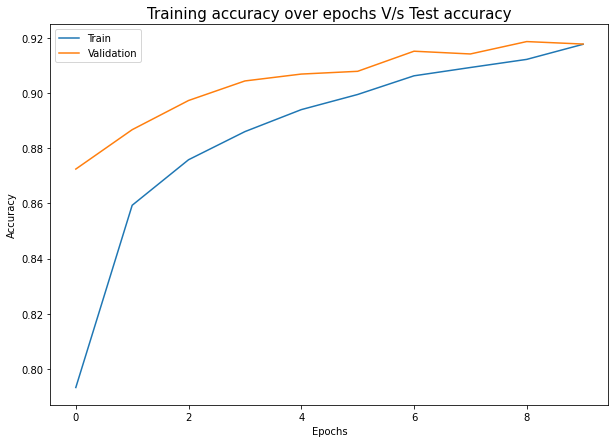

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 7))
plt.plot(CNN.history['accuracy'])
plt.plot(CNN.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy over epochs V/s Test accuracy', fontsize = 15)
plt.legend(['Train','Validation'])


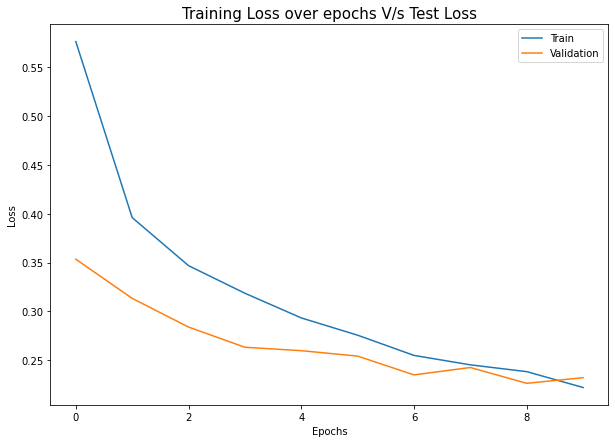

In [42]:
plt.figure(figsize = (10, 7))
plt.plot(CNN.history['loss'])
plt.plot(CNN.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over epochs V/s Test Loss', fontsize = 15)
plt.legend(['Train','Validation'])

Part IV: Optimizing CNN + Data Argumentation

Dropout Tuning

Setup 1 - 0.25

In [45]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),
                activation='relu',
                 padding="valid",
                 kernel_initializer="glorot_uniform",
                input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=(3,3),
                 padding="valid",
                 kernel_initializer="glorot_uniform",
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_15 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_14 (Dropout)        (None, 12, 12, 32)        0         
                                                                 
 flatten_7 (Flatten)         (None, 4608)              0         
                                                                 
 dense_14 (Dense)            (None, 64)                294976    
                                                      

In [46]:
model.compile(loss='categorical_crossentropy',optimizer='adam',
             metrics=['accuracy'])

from keras.callbacks import EarlyStopping
CNN = model.fit(trainX, trainy,
             batch_size = 64,
             epochs = 10,
             verbose = 2,
             validation_data=(testX, testy),
               callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

Epoch 1/10
938/938 - 8s - loss: 0.4947 - accuracy: 0.8241 - val_loss: 0.3457 - val_accuracy: 0.8767 - 8s/epoch - 8ms/step
Epoch 2/10
938/938 - 6s - loss: 0.3311 - accuracy: 0.8814 - val_loss: 0.2936 - val_accuracy: 0.8937 - 6s/epoch - 7ms/step
Epoch 3/10
938/938 - 6s - loss: 0.2870 - accuracy: 0.8965 - val_loss: 0.2692 - val_accuracy: 0.8989 - 6s/epoch - 7ms/step
Epoch 4/10
938/938 - 6s - loss: 0.2583 - accuracy: 0.9053 - val_loss: 0.2661 - val_accuracy: 0.9019 - 6s/epoch - 7ms/step
Epoch 5/10
938/938 - 6s - loss: 0.2334 - accuracy: 0.9144 - val_loss: 0.2405 - val_accuracy: 0.9093 - 6s/epoch - 7ms/step
Epoch 6/10
938/938 - 6s - loss: 0.2142 - accuracy: 0.9212 - val_loss: 0.2344 - val_accuracy: 0.9141 - 6s/epoch - 7ms/step
Epoch 7/10
938/938 - 6s - loss: 0.1990 - accuracy: 0.9252 - val_loss: 0.2240 - val_accuracy: 0.9170 - 6s/epoch - 7ms/step
Epoch 8/10
938/938 - 6s - loss: 0.1859 - accuracy: 0.9302 - val_loss: 0.2237 - val_accuracy: 0.9195 - 6s/epoch - 7ms/step
Epoch 9/10
938/938 - 6s 

In [47]:
score = model.evaluate(testX, testy,verbose=0)
print(score)
print('loss: ',score[0])
print('accuracy: ',score[1])

[0.2230246514081955, 0.923799991607666]
loss:  0.2230246514081955
accuracy:  0.923799991607666


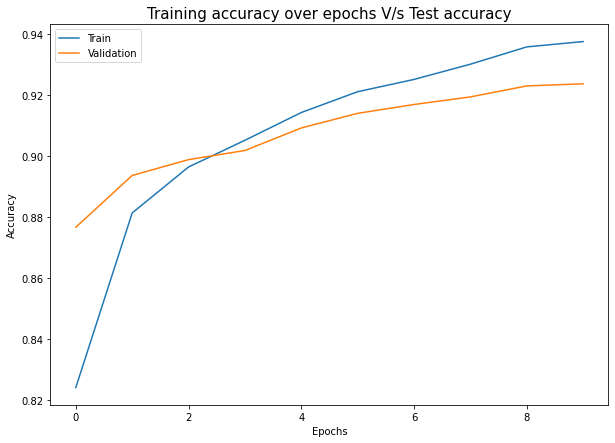

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 7))
plt.plot(CNN.history['accuracy'])
plt.plot(CNN.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy over epochs V/s Test accuracy', fontsize = 15)
plt.legend(['Train','Validation'])


Setup 2 - 0.5

In [51]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),
                activation='relu',
                 padding="valid",
                 kernel_initializer="glorot_uniform",
                input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=(3,3),
                 padding="valid",
                 kernel_initializer="glorot_uniform",
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_19 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_18 (Dropout)        (None, 12, 12, 32)        0         
                                                                 
 flatten_9 (Flatten)         (None, 4608)              0         
                                                                 
 dense_18 (Dense)            (None, 64)                294976    
                                                      

In [52]:
model.compile(loss='categorical_crossentropy',optimizer='adam',
             metrics=['accuracy'])

from keras.callbacks import EarlyStopping
CNN = model.fit(trainX, trainy,
             batch_size = 64,
             epochs = 10,
             verbose = 2,
             validation_data=(testX, testy),
               callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

Epoch 1/10
938/938 - 7s - loss: 0.6161 - accuracy: 0.7821 - val_loss: 0.3681 - val_accuracy: 0.8671 - 7s/epoch - 8ms/step
Epoch 2/10
938/938 - 6s - loss: 0.4314 - accuracy: 0.8458 - val_loss: 0.3386 - val_accuracy: 0.8836 - 6s/epoch - 7ms/step
Epoch 3/10
938/938 - 6s - loss: 0.3838 - accuracy: 0.8628 - val_loss: 0.2951 - val_accuracy: 0.8938 - 6s/epoch - 7ms/step
Epoch 4/10
938/938 - 6s - loss: 0.3568 - accuracy: 0.8724 - val_loss: 0.2782 - val_accuracy: 0.8999 - 6s/epoch - 7ms/step
Epoch 5/10
938/938 - 6s - loss: 0.3318 - accuracy: 0.8824 - val_loss: 0.2614 - val_accuracy: 0.9072 - 6s/epoch - 7ms/step
Epoch 6/10
938/938 - 6s - loss: 0.3174 - accuracy: 0.8859 - val_loss: 0.2619 - val_accuracy: 0.9030 - 6s/epoch - 7ms/step
Epoch 7/10
938/938 - 6s - loss: 0.3054 - accuracy: 0.8903 - val_loss: 0.2454 - val_accuracy: 0.9120 - 6s/epoch - 7ms/step
Epoch 8/10
938/938 - 6s - loss: 0.2904 - accuracy: 0.8947 - val_loss: 0.2370 - val_accuracy: 0.9131 - 6s/epoch - 7ms/step
Epoch 9/10
938/938 - 6s 

In [53]:
score = model.evaluate(testX, testy,verbose=0)
print(score)
print('loss: ',score[0])
print('accuracy: ',score[1])

[0.2309870421886444, 0.9139999747276306]
loss:  0.2309870421886444
accuracy:  0.9139999747276306


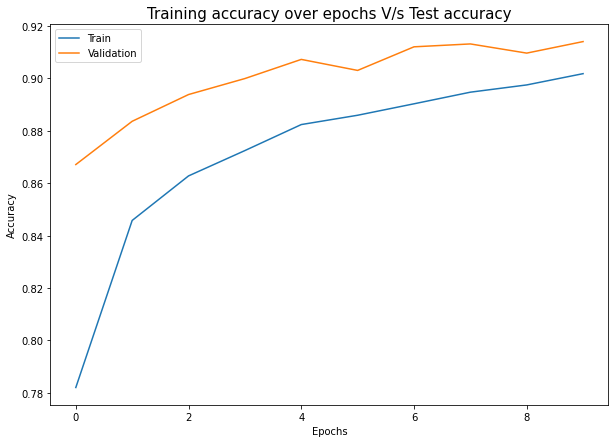

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 7))
plt.plot(CNN.history['accuracy'])
plt.plot(CNN.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy over epochs V/s Test accuracy', fontsize = 15)
plt.legend(['Train','Validation'])


Steup 3 - 0.75

In [55]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),
                activation='relu',
                 padding="valid",
                 kernel_initializer="glorot_uniform",
                input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=(3,3),
                 padding="valid",
                 kernel_initializer="glorot_uniform",
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.75))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.75))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_21 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 12, 12, 32)        0         
                                                                 
 flatten_10 (Flatten)        (None, 4608)              0         
                                                                 
 dense_20 (Dense)            (None, 64)                294976    
                                                     

In [56]:
model.compile(loss='categorical_crossentropy',optimizer='adam',
             metrics=['accuracy'])

from keras.callbacks import EarlyStopping
CNN = model.fit(trainX, trainy,
             batch_size = 64,
             epochs = 10,
             verbose = 2,
             validation_data=(testX, testy),
               callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

Epoch 1/10
938/938 - 7s - loss: 0.9041 - accuracy: 0.6597 - val_loss: 0.4884 - val_accuracy: 0.8189 - 7s/epoch - 8ms/step
Epoch 2/10
938/938 - 6s - loss: 0.6875 - accuracy: 0.7391 - val_loss: 0.4380 - val_accuracy: 0.8364 - 6s/epoch - 7ms/step
Epoch 3/10
938/938 - 6s - loss: 0.6267 - accuracy: 0.7596 - val_loss: 0.4069 - val_accuracy: 0.8509 - 6s/epoch - 7ms/step
Epoch 4/10
938/938 - 6s - loss: 0.5969 - accuracy: 0.7735 - val_loss: 0.3859 - val_accuracy: 0.8661 - 6s/epoch - 7ms/step
Epoch 5/10
938/938 - 6s - loss: 0.5706 - accuracy: 0.7838 - val_loss: 0.3694 - val_accuracy: 0.8610 - 6s/epoch - 7ms/step
Epoch 6/10
938/938 - 6s - loss: 0.5550 - accuracy: 0.7899 - val_loss: 0.3566 - val_accuracy: 0.8715 - 6s/epoch - 7ms/step
Epoch 7/10
938/938 - 6s - loss: 0.5373 - accuracy: 0.7974 - val_loss: 0.3382 - val_accuracy: 0.8780 - 6s/epoch - 7ms/step
Epoch 8/10
938/938 - 6s - loss: 0.5287 - accuracy: 0.7997 - val_loss: 0.3358 - val_accuracy: 0.8855 - 6s/epoch - 7ms/step
Epoch 9/10
938/938 - 6s 

In [57]:
score = model.evaluate(testX, testy,verbose=0)
print(score)
print('loss: ',score[0])
print('accuracy: ',score[1])

[0.3166729807853699, 0.8895999789237976]
loss:  0.3166729807853699
accuracy:  0.8895999789237976


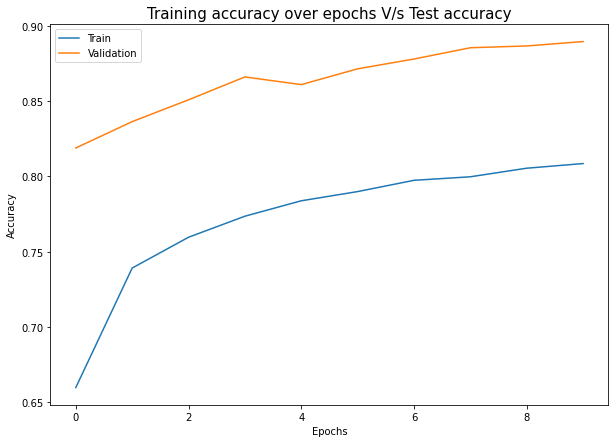

In [59]:
plt.figure(figsize = (10, 7))
plt.plot(CNN.history['accuracy'])
plt.plot(CNN.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy over epochs V/s Test accuracy', fontsize = 15)
plt.legend(['Train','Validation'])


Optimiser Tuning

Setup 1 - adam

In [60]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),
                activation='relu',
                 padding="valid",
                 kernel_initializer="glorot_uniform",
                input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=(3,3),
                 padding="valid",
                 kernel_initializer="glorot_uniform",
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_23 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 dropout_22 (Dropout)        (None, 12, 12, 32)        0         
                                                                 
 flatten_11 (Flatten)        (None, 4608)              0         
                                                                 
 dense_22 (Dense)            (None, 64)                294976    
                                                     

In [61]:
model.compile(loss='categorical_crossentropy',optimizer='adam',
             metrics=['accuracy'])

from keras.callbacks import EarlyStopping
CNN = model.fit(trainX, trainy,
             batch_size = 64,
             epochs = 10,
             verbose = 2,
             validation_data=(testX, testy),
               callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

Epoch 1/10
938/938 - 7s - loss: 0.5781 - accuracy: 0.7975 - val_loss: 0.3621 - val_accuracy: 0.8713 - 7s/epoch - 8ms/step
Epoch 2/10
938/938 - 6s - loss: 0.3895 - accuracy: 0.8627 - val_loss: 0.3051 - val_accuracy: 0.8871 - 6s/epoch - 7ms/step
Epoch 3/10
938/938 - 6s - loss: 0.3385 - accuracy: 0.8775 - val_loss: 0.2737 - val_accuracy: 0.9006 - 6s/epoch - 7ms/step
Epoch 4/10
938/938 - 6s - loss: 0.3090 - accuracy: 0.8879 - val_loss: 0.2645 - val_accuracy: 0.9067 - 6s/epoch - 7ms/step
Epoch 5/10
938/938 - 6s - loss: 0.2850 - accuracy: 0.8971 - val_loss: 0.2448 - val_accuracy: 0.9136 - 6s/epoch - 7ms/step
Epoch 6/10
938/938 - 7s - loss: 0.2678 - accuracy: 0.9025 - val_loss: 0.2494 - val_accuracy: 0.9086 - 7s/epoch - 7ms/step
Epoch 7/10
938/938 - 6s - loss: 0.2556 - accuracy: 0.9078 - val_loss: 0.2291 - val_accuracy: 0.9168 - 6s/epoch - 7ms/step
Epoch 8/10
938/938 - 7s - loss: 0.2411 - accuracy: 0.9105 - val_loss: 0.2263 - val_accuracy: 0.9175 - 7s/epoch - 7ms/step
Epoch 9/10
938/938 - 6s 

In [62]:
score = model.evaluate(testX, testy,verbose=0)
print(score)
print('loss: ',score[0])
print('accuracy: ',score[1])

[0.21796675026416779, 0.9228000044822693]
loss:  0.21796675026416779
accuracy:  0.9228000044822693


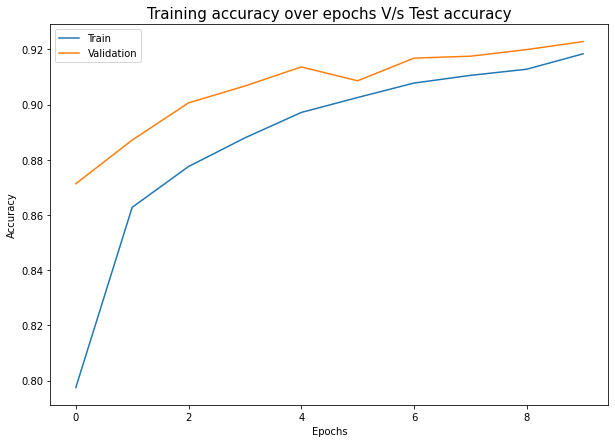

In [63]:

plt.figure(figsize = (10, 7))
plt.plot(CNN.history['accuracy'])
plt.plot(CNN.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy over epochs V/s Test accuracy', fontsize = 15)
plt.legend(['Train','Validation'])


Setup 2 - SGD

In [64]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),
                activation='relu',
                 padding="valid",
                 kernel_initializer="glorot_uniform",
                input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=(3,3),
                 padding="valid",
                 kernel_initializer="glorot_uniform",
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_25 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 12, 12, 32)        0         
                                                                 
 flatten_12 (Flatten)        (None, 4608)              0         
                                                                 
 dense_24 (Dense)            (None, 64)                294976    
                                                     

In [65]:
model.compile(loss='categorical_crossentropy',optimizer='SGD',
             metrics=['accuracy'])

from keras.callbacks import EarlyStopping
CNN = model.fit(trainX, trainy,
             batch_size = 64,
             epochs = 10,
             verbose = 2,
             validation_data=(testX, testy),
               callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

Epoch 1/10
938/938 - 7s - loss: 1.1255 - accuracy: 0.5891 - val_loss: 0.6549 - val_accuracy: 0.7500 - 7s/epoch - 8ms/step
Epoch 2/10
938/938 - 6s - loss: 0.7515 - accuracy: 0.7180 - val_loss: 0.5930 - val_accuracy: 0.7762 - 6s/epoch - 7ms/step
Epoch 3/10
938/938 - 6s - loss: 0.6747 - accuracy: 0.7460 - val_loss: 0.5402 - val_accuracy: 0.7927 - 6s/epoch - 7ms/step
Epoch 4/10
938/938 - 6s - loss: 0.6204 - accuracy: 0.7685 - val_loss: 0.5089 - val_accuracy: 0.8007 - 6s/epoch - 7ms/step
Epoch 5/10
938/938 - 6s - loss: 0.5831 - accuracy: 0.7825 - val_loss: 0.4831 - val_accuracy: 0.8185 - 6s/epoch - 7ms/step
Epoch 6/10
938/938 - 6s - loss: 0.5533 - accuracy: 0.7957 - val_loss: 0.4592 - val_accuracy: 0.8309 - 6s/epoch - 7ms/step
Epoch 7/10
938/938 - 6s - loss: 0.5251 - accuracy: 0.8108 - val_loss: 0.4332 - val_accuracy: 0.8385 - 6s/epoch - 7ms/step
Epoch 8/10
938/938 - 6s - loss: 0.5005 - accuracy: 0.8191 - val_loss: 0.4147 - val_accuracy: 0.8511 - 6s/epoch - 7ms/step
Epoch 9/10
938/938 - 6s 

In [66]:
score = model.evaluate(testX, testy,verbose=0)
print(score)
print('loss: ',score[0])
print('accuracy: ',score[1])

[0.3874107599258423, 0.8579000234603882]
loss:  0.3874107599258423
accuracy:  0.8579000234603882


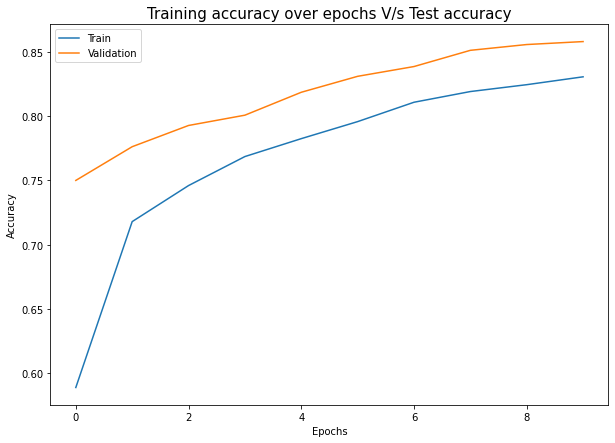

In [67]:

plt.figure(figsize = (10, 7))
plt.plot(CNN.history['accuracy'])
plt.plot(CNN.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy over epochs V/s Test accuracy', fontsize = 15)
plt.legend(['Train','Validation'])


Setup 3 - Adadelta

In [68]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),
                activation='relu',
                 padding="valid",
                 kernel_initializer="glorot_uniform",
                input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=(3,3),
                 padding="valid",
                 kernel_initializer="glorot_uniform",
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_27 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 dropout_26 (Dropout)        (None, 12, 12, 32)        0         
                                                                 
 flatten_13 (Flatten)        (None, 4608)              0         
                                                                 
 dense_26 (Dense)            (None, 64)                294976    
                                                     

In [69]:
model.compile(loss='categorical_crossentropy',optimizer='Adadelta',
             metrics=['accuracy'])

from keras.callbacks import EarlyStopping
CNN = model.fit(trainX, trainy,
             batch_size = 64,
             epochs = 10,
             verbose = 2,
             validation_data=(testX, testy),
               callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

Epoch 1/10
938/938 - 7s - loss: 2.2808 - accuracy: 0.1500 - val_loss: 2.2408 - val_accuracy: 0.2930 - 7s/epoch - 8ms/step
Epoch 2/10
938/938 - 6s - loss: 2.2146 - accuracy: 0.2524 - val_loss: 2.1566 - val_accuracy: 0.4008 - 6s/epoch - 7ms/step
Epoch 3/10
938/938 - 6s - loss: 2.1262 - accuracy: 0.3202 - val_loss: 2.0402 - val_accuracy: 0.4250 - 6s/epoch - 7ms/step
Epoch 4/10
938/938 - 7s - loss: 2.0122 - accuracy: 0.3612 - val_loss: 1.8941 - val_accuracy: 0.4589 - 7s/epoch - 7ms/step
Epoch 5/10
938/938 - 6s - loss: 1.8830 - accuracy: 0.3893 - val_loss: 1.7364 - val_accuracy: 0.4941 - 6s/epoch - 7ms/step
Epoch 6/10
938/938 - 6s - loss: 1.7624 - accuracy: 0.4094 - val_loss: 1.5876 - val_accuracy: 0.5266 - 6s/epoch - 7ms/step
Epoch 7/10
938/938 - 6s - loss: 1.6518 - accuracy: 0.4341 - val_loss: 1.4562 - val_accuracy: 0.5479 - 6s/epoch - 7ms/step
Epoch 8/10
938/938 - 6s - loss: 1.5664 - accuracy: 0.4516 - val_loss: 1.3499 - val_accuracy: 0.5632 - 6s/epoch - 7ms/step
Epoch 9/10
938/938 - 7s 

In [70]:
score = model.evaluate(testX, testy,verbose=0)
print(score)
print('loss: ',score[0])
print('accuracy: ',score[1])

[1.1952309608459473, 0.6051999926567078]
loss:  1.1952309608459473
accuracy:  0.6051999926567078


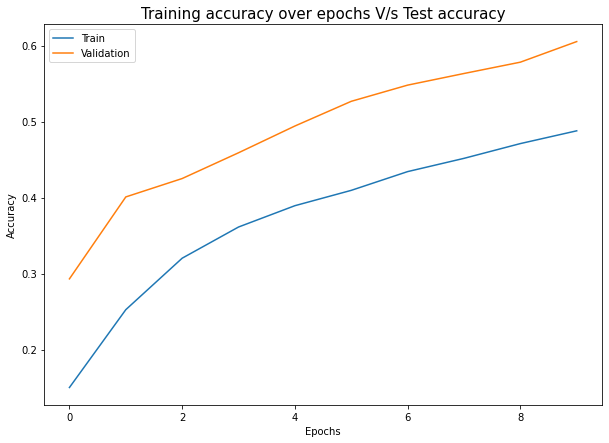

In [71]:

plt.figure(figsize = (10, 7))
plt.plot(CNN.history['accuracy'])
plt.plot(CNN.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy over epochs V/s Test accuracy', fontsize = 15)
plt.legend(['Train','Validation'])


Activation Function Tuning

Setup 1 - relu

In [76]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),
                activation='relu',
                 padding="valid",
                 kernel_initializer="glorot_uniform",
                input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=(3,3),
                 padding="valid",
                 kernel_initializer="glorot_uniform",
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_31 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 dropout_30 (Dropout)        (None, 12, 12, 32)        0         
                                                                 
 flatten_15 (Flatten)        (None, 4608)              0         
                                                                 
 dense_30 (Dense)            (None, 64)                294976    
                                                     

In [77]:
model.compile(loss='categorical_crossentropy',optimizer='adam',
             metrics=['accuracy'])

from keras.callbacks import EarlyStopping
CNN = model.fit(trainX, trainy,
             batch_size = 64,
             epochs = 10,
             verbose = 2,
             validation_data=(testX, testy),
               callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

Epoch 1/10
938/938 - 21s - loss: 0.6003 - accuracy: 0.7889 - val_loss: 0.3828 - val_accuracy: 0.8612 - 21s/epoch - 22ms/step
Epoch 2/10
938/938 - 6s - loss: 0.4118 - accuracy: 0.8524 - val_loss: 0.3243 - val_accuracy: 0.8798 - 6s/epoch - 7ms/step
Epoch 3/10
938/938 - 6s - loss: 0.3602 - accuracy: 0.8715 - val_loss: 0.2810 - val_accuracy: 0.8980 - 6s/epoch - 7ms/step
Epoch 4/10
938/938 - 6s - loss: 0.3255 - accuracy: 0.8823 - val_loss: 0.2627 - val_accuracy: 0.9052 - 6s/epoch - 7ms/step
Epoch 5/10
938/938 - 6s - loss: 0.3051 - accuracy: 0.8910 - val_loss: 0.2625 - val_accuracy: 0.9031 - 6s/epoch - 7ms/step
Epoch 6/10
938/938 - 6s - loss: 0.2845 - accuracy: 0.8951 - val_loss: 0.2501 - val_accuracy: 0.9065 - 6s/epoch - 7ms/step
Epoch 7/10
938/938 - 6s - loss: 0.2691 - accuracy: 0.9009 - val_loss: 0.2384 - val_accuracy: 0.9154 - 6s/epoch - 7ms/step
Epoch 8/10
938/938 - 6s - loss: 0.2543 - accuracy: 0.9057 - val_loss: 0.2440 - val_accuracy: 0.9127 - 6s/epoch - 7ms/step
Epoch 9/10
938/938 - 

In [78]:
score = model.evaluate(testX, testy,verbose=0)
print('loss: ',score[0])
print('accuracy: ',score[1])

loss:  0.2267698049545288
accuracy:  0.9190000295639038


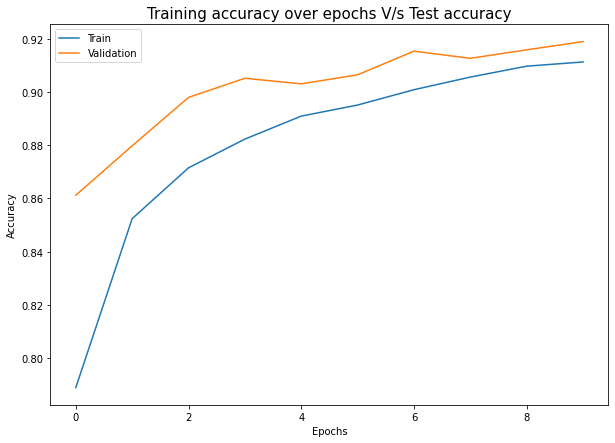

In [79]:
plt.figure(figsize = (10, 7))
plt.plot(CNN.history['accuracy'])
plt.plot(CNN.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy over epochs V/s Test accuracy', fontsize = 15)
plt.legend(['Train','Validation'])


Setup 2 - selu

In [85]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),
                activation='selu',
                 padding="valid",
                 kernel_initializer="glorot_uniform",
                input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=(3,3),
                 padding="valid",
                 kernel_initializer="glorot_uniform",
                activation='selu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64,activation='selu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_37 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 dropout_36 (Dropout)        (None, 12, 12, 32)        0         
                                                                 
 flatten_18 (Flatten)        (None, 4608)              0         
                                                                 
 dense_36 (Dense)            (None, 64)                294976    
                                                     

In [86]:
model.compile(loss='categorical_crossentropy',optimizer='adam',
             metrics=['accuracy'])

from keras.callbacks import EarlyStopping
CNN = model.fit(trainX, trainy,
             batch_size = 64,
             epochs = 10,
             verbose = 2,
             validation_data=(testX, testy),
               callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

Epoch 1/10
938/938 - 8s - loss: 0.5206 - accuracy: 0.8237 - val_loss: 0.3512 - val_accuracy: 0.8770 - 8s/epoch - 8ms/step
Epoch 2/10
938/938 - 7s - loss: 0.3782 - accuracy: 0.8705 - val_loss: 0.3220 - val_accuracy: 0.8866 - 7s/epoch - 7ms/step
Epoch 3/10
938/938 - 6s - loss: 0.3371 - accuracy: 0.8827 - val_loss: 0.3123 - val_accuracy: 0.8868 - 6s/epoch - 7ms/step
Epoch 4/10
938/938 - 6s - loss: 0.3194 - accuracy: 0.8884 - val_loss: 0.2945 - val_accuracy: 0.8951 - 6s/epoch - 7ms/step
Epoch 5/10
938/938 - 6s - loss: 0.3033 - accuracy: 0.8936 - val_loss: 0.2811 - val_accuracy: 0.8996 - 6s/epoch - 7ms/step
Epoch 6/10
938/938 - 6s - loss: 0.2902 - accuracy: 0.8979 - val_loss: 0.2942 - val_accuracy: 0.8927 - 6s/epoch - 7ms/step
Epoch 7/10
938/938 - 6s - loss: 0.2795 - accuracy: 0.8999 - val_loss: 0.2957 - val_accuracy: 0.8915 - 6s/epoch - 7ms/step
Epoch 8/10
938/938 - 6s - loss: 0.2729 - accuracy: 0.9020 - val_loss: 0.2679 - val_accuracy: 0.9041 - 6s/epoch - 7ms/step
Epoch 9/10
938/938 - 6s 

In [87]:
score = model.evaluate(testX, testy,verbose=0)
print('loss: ',score[0])
print('accuracy: ',score[1])

loss:  0.2712791860103607
accuracy:  0.9023000001907349


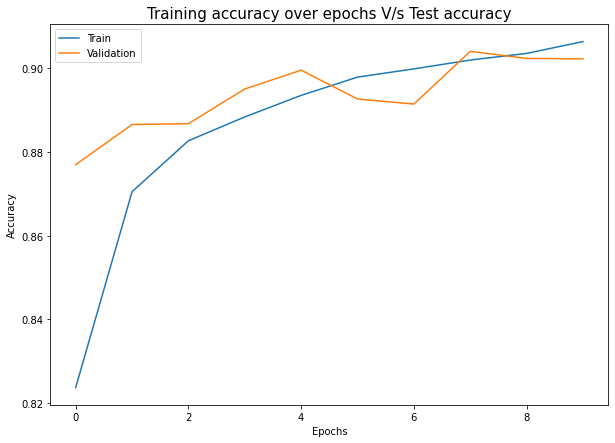

In [88]:
plt.figure(figsize = (10, 7))
plt.plot(CNN.history['accuracy'])
plt.plot(CNN.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy over epochs V/s Test accuracy', fontsize = 15)
plt.legend(['Train','Validation'])


Setup 3 - elu

In [89]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),
                activation='elu',
                 padding="valid",
                 kernel_initializer="glorot_uniform",
                input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=(3,3),
                 padding="valid",
                 kernel_initializer="glorot_uniform",
                activation='elu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64,activation='elu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_39 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 dropout_38 (Dropout)        (None, 12, 12, 32)        0         
                                                                 
 flatten_19 (Flatten)        (None, 4608)              0         
                                                                 
 dense_38 (Dense)            (None, 64)                294976    
                                                     

In [90]:
model.compile(loss='categorical_crossentropy',optimizer='adam',
             metrics=['accuracy'])

from keras.callbacks import EarlyStopping
CNN = model.fit(trainX, trainy,
             batch_size = 64,
             epochs = 10,
             verbose = 2,
             validation_data=(testX, testy),
               callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

Epoch 1/10
938/938 - 7s - loss: 0.5050 - accuracy: 0.8257 - val_loss: 0.3400 - val_accuracy: 0.8768 - 7s/epoch - 8ms/step
Epoch 2/10
938/938 - 6s - loss: 0.3677 - accuracy: 0.8709 - val_loss: 0.3205 - val_accuracy: 0.8831 - 6s/epoch - 7ms/step
Epoch 3/10
938/938 - 6s - loss: 0.3321 - accuracy: 0.8820 - val_loss: 0.3001 - val_accuracy: 0.8917 - 6s/epoch - 7ms/step
Epoch 4/10
938/938 - 6s - loss: 0.3108 - accuracy: 0.8889 - val_loss: 0.2884 - val_accuracy: 0.8950 - 6s/epoch - 7ms/step
Epoch 5/10
938/938 - 6s - loss: 0.2989 - accuracy: 0.8928 - val_loss: 0.2731 - val_accuracy: 0.8984 - 6s/epoch - 7ms/step
Epoch 6/10
938/938 - 7s - loss: 0.2873 - accuracy: 0.8968 - val_loss: 0.2694 - val_accuracy: 0.9034 - 7s/epoch - 7ms/step
Epoch 7/10
938/938 - 6s - loss: 0.2739 - accuracy: 0.8999 - val_loss: 0.2784 - val_accuracy: 0.9010 - 6s/epoch - 7ms/step
Epoch 8/10
938/938 - 6s - loss: 0.2682 - accuracy: 0.9019 - val_loss: 0.2626 - val_accuracy: 0.9033 - 6s/epoch - 7ms/step
Epoch 9/10
938/938 - 6s 

In [91]:
score = model.evaluate(testX, testy,verbose=0)
print('loss: ',score[0])
print('accuracy: ',score[1])

loss:  0.2621159255504608
accuracy:  0.9067999720573425


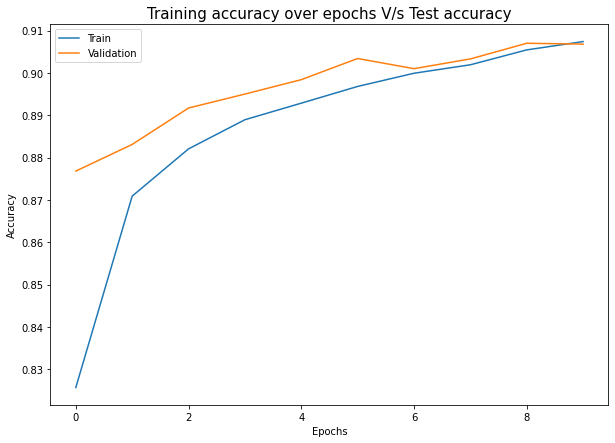

In [92]:
plt.figure(figsize = (10, 7))
plt.plot(CNN.history['accuracy'])
plt.plot(CNN.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy over epochs V/s Test accuracy', fontsize = 15)
plt.legend(['Train','Validation'])


 Initializer Tuning

Setup 1 - glorot_uniform

In [93]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),
                activation='relu',
                 padding="valid",
                 kernel_initializer="glorot_uniform",
                input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=(3,3),
                 padding="valid",
                 kernel_initializer="glorot_uniform",
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_41 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 dropout_40 (Dropout)        (None, 12, 12, 32)        0         
                                                                 
 flatten_20 (Flatten)        (None, 4608)              0         
                                                                 
 dense_40 (Dense)            (None, 64)                294976    
                                                     

In [94]:
model.compile(loss='categorical_crossentropy',optimizer='adam',
             metrics=['accuracy'])

from keras.callbacks import EarlyStopping
CNN = model.fit(trainX, trainy,
             batch_size = 64,
             epochs = 10,
             verbose = 2,
             validation_data=(testX, testy),
               callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

Epoch 1/10
938/938 - 8s - loss: 0.5848 - accuracy: 0.7948 - val_loss: 0.3622 - val_accuracy: 0.8688 - 8s/epoch - 8ms/step
Epoch 2/10
938/938 - 7s - loss: 0.4033 - accuracy: 0.8561 - val_loss: 0.3110 - val_accuracy: 0.8865 - 7s/epoch - 7ms/step
Epoch 3/10
938/938 - 6s - loss: 0.3531 - accuracy: 0.8736 - val_loss: 0.2856 - val_accuracy: 0.8954 - 6s/epoch - 7ms/step
Epoch 4/10
938/938 - 6s - loss: 0.3183 - accuracy: 0.8857 - val_loss: 0.2651 - val_accuracy: 0.9035 - 6s/epoch - 7ms/step
Epoch 5/10
938/938 - 7s - loss: 0.2975 - accuracy: 0.8908 - val_loss: 0.2565 - val_accuracy: 0.9090 - 7s/epoch - 7ms/step
Epoch 6/10
938/938 - 7s - loss: 0.2766 - accuracy: 0.8983 - val_loss: 0.2481 - val_accuracy: 0.9099 - 7s/epoch - 7ms/step
Epoch 7/10
938/938 - 7s - loss: 0.2639 - accuracy: 0.9025 - val_loss: 0.2406 - val_accuracy: 0.9122 - 7s/epoch - 7ms/step
Epoch 8/10
938/938 - 6s - loss: 0.2501 - accuracy: 0.9079 - val_loss: 0.2378 - val_accuracy: 0.9116 - 6s/epoch - 7ms/step
Epoch 9/10
938/938 - 7s 

In [95]:
score = model.evaluate(testX, testy,verbose=0)
print('loss: ',score[0])
print('accuracy: ',score[1])

loss:  0.24081780016422272
accuracy:  0.9129999876022339


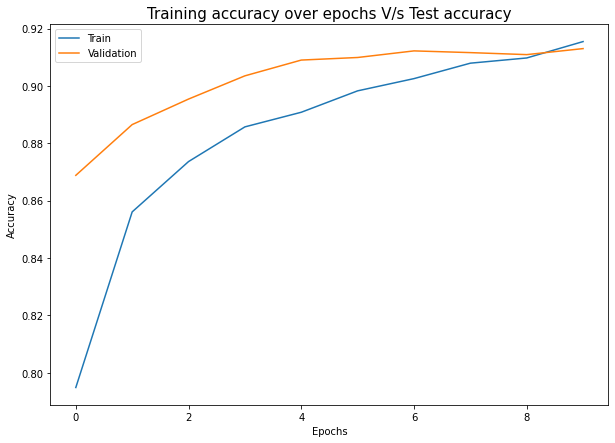

In [96]:
plt.figure(figsize = (10, 7))
plt.plot(CNN.history['accuracy'])
plt.plot(CNN.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy over epochs V/s Test accuracy', fontsize = 15)
plt.legend(['Train','Validation'])


Setup 2 - glorot_normal

In [97]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),
                activation='relu',
                 padding="valid",
                 kernel_initializer="glorot_normal",
                input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=(3,3),
                 padding="valid",
                 kernel_initializer="glorot_normal",
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_43 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 dropout_42 (Dropout)        (None, 12, 12, 32)        0         
                                                                 
 flatten_21 (Flatten)        (None, 4608)              0         
                                                                 
 dense_42 (Dense)            (None, 64)                294976    
                                                     

In [98]:
model.compile(loss='categorical_crossentropy',optimizer='adam',
             metrics=['accuracy'])

from keras.callbacks import EarlyStopping
CNN = model.fit(trainX, trainy,
             batch_size = 64,
             epochs = 10,
             verbose = 2,
             validation_data=(testX, testy),
               callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

Epoch 1/10
938/938 - 8s - loss: 0.6144 - accuracy: 0.7821 - val_loss: 0.3537 - val_accuracy: 0.8723 - 8s/epoch - 8ms/step
Epoch 2/10
938/938 - 7s - loss: 0.4103 - accuracy: 0.8556 - val_loss: 0.3153 - val_accuracy: 0.8866 - 7s/epoch - 7ms/step
Epoch 3/10
938/938 - 7s - loss: 0.3586 - accuracy: 0.8726 - val_loss: 0.2836 - val_accuracy: 0.8971 - 7s/epoch - 7ms/step
Epoch 4/10
938/938 - 7s - loss: 0.3273 - accuracy: 0.8822 - val_loss: 0.2723 - val_accuracy: 0.8985 - 7s/epoch - 7ms/step
Epoch 5/10
938/938 - 6s - loss: 0.3033 - accuracy: 0.8904 - val_loss: 0.2475 - val_accuracy: 0.9091 - 6s/epoch - 7ms/step
Epoch 6/10
938/938 - 6s - loss: 0.2872 - accuracy: 0.8975 - val_loss: 0.2460 - val_accuracy: 0.9123 - 6s/epoch - 7ms/step
Epoch 7/10
938/938 - 7s - loss: 0.2718 - accuracy: 0.9022 - val_loss: 0.2378 - val_accuracy: 0.9146 - 7s/epoch - 7ms/step
Epoch 8/10
938/938 - 7s - loss: 0.2553 - accuracy: 0.9061 - val_loss: 0.2434 - val_accuracy: 0.9138 - 7s/epoch - 7ms/step
Epoch 9/10
938/938 - 6s 

In [99]:
score = model.evaluate(testX, testy,verbose=0)
print('loss: ',score[0])
print('accuracy: ',score[1])

loss:  0.2290792167186737
accuracy:  0.9182999730110168


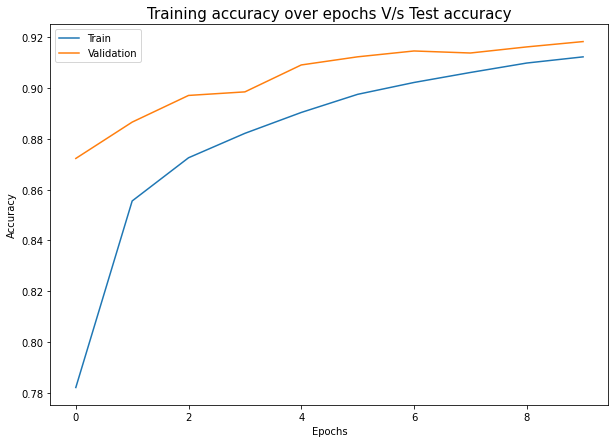

In [100]:
plt.figure(figsize = (10, 7))
plt.plot(CNN.history['accuracy'])
plt.plot(CNN.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy over epochs V/s Test accuracy', fontsize = 15)
plt.legend(['Train','Validation'])


Setup 3 - random_uniform

In [101]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),
                activation='relu',
                 padding="valid",
                 kernel_initializer="random_uniform",
                input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=(3,3),
                 padding="valid",
                 kernel_initializer="random_uniform",
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_45 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 dropout_44 (Dropout)        (None, 12, 12, 32)        0         
                                                                 
 flatten_22 (Flatten)        (None, 4608)              0         
                                                                 
 dense_44 (Dense)            (None, 64)                294976    
                                                     

In [102]:
model.compile(loss='categorical_crossentropy',optimizer='adam',
             metrics=['accuracy'])

from keras.callbacks import EarlyStopping
CNN = model.fit(trainX, trainy,
             batch_size = 64,
             epochs = 10,
             verbose = 2,
             validation_data=(testX, testy),
               callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

Epoch 1/10
938/938 - 8s - loss: 0.6610 - accuracy: 0.7635 - val_loss: 0.4015 - val_accuracy: 0.8549 - 8s/epoch - 8ms/step
Epoch 2/10
938/938 - 7s - loss: 0.4501 - accuracy: 0.8392 - val_loss: 0.3414 - val_accuracy: 0.8753 - 7s/epoch - 7ms/step
Epoch 3/10
938/938 - 6s - loss: 0.3969 - accuracy: 0.8565 - val_loss: 0.3207 - val_accuracy: 0.8828 - 6s/epoch - 7ms/step
Epoch 4/10
938/938 - 6s - loss: 0.3653 - accuracy: 0.8660 - val_loss: 0.2921 - val_accuracy: 0.8955 - 6s/epoch - 7ms/step
Epoch 5/10
938/938 - 7s - loss: 0.3374 - accuracy: 0.8769 - val_loss: 0.2715 - val_accuracy: 0.9040 - 7s/epoch - 7ms/step
Epoch 6/10
938/938 - 7s - loss: 0.3219 - accuracy: 0.8820 - val_loss: 0.2664 - val_accuracy: 0.9058 - 7s/epoch - 7ms/step
Epoch 7/10
938/938 - 7s - loss: 0.3044 - accuracy: 0.8900 - val_loss: 0.2563 - val_accuracy: 0.9056 - 7s/epoch - 7ms/step
Epoch 8/10
938/938 - 7s - loss: 0.2834 - accuracy: 0.8961 - val_loss: 0.2509 - val_accuracy: 0.9111 - 7s/epoch - 7ms/step
Epoch 9/10
938/938 - 7s 

In [103]:
score = model.evaluate(testX, testy,verbose=0)
print('loss: ',score[0])
print('accuracy: ',score[1])

loss:  0.2448551058769226
accuracy:  0.9132999777793884


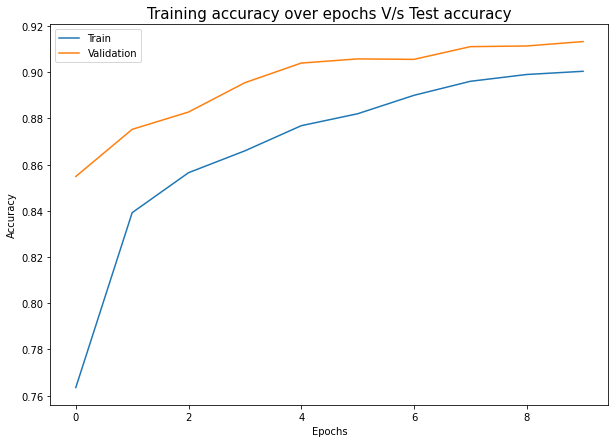

In [104]:
plt.figure(figsize = (10, 7))
plt.plot(CNN.history['accuracy'])
plt.plot(CNN.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy over epochs V/s Test accuracy', fontsize = 15)
plt.legend(['Train','Validation'])


Kernel size Tuning

Setup 1 - (3,3)

In [106]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),
                activation='relu',
                 padding="valid",
                 kernel_initializer="glorot_uniform",
                input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=(3,3),
                 padding="valid",
                 kernel_initializer="glorot_uniform",
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_49 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 dropout_48 (Dropout)        (None, 12, 12, 32)        0         
                                                                 
 flatten_24 (Flatten)        (None, 4608)              0         
                                                                 
 dense_48 (Dense)            (None, 64)                294976    
                                                     

In [107]:
model.compile(loss='categorical_crossentropy',optimizer='adam',
             metrics=['accuracy'])

from keras.callbacks import EarlyStopping
CNN = model.fit(trainX, trainy,
             batch_size = 64,
             epochs = 10,
             verbose = 2,
             validation_data=(testX, testy),
               callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

Epoch 1/10
938/938 - 7s - loss: 0.6137 - accuracy: 0.7804 - val_loss: 0.3686 - val_accuracy: 0.8653 - 7s/epoch - 8ms/step
Epoch 2/10
938/938 - 6s - loss: 0.4153 - accuracy: 0.8514 - val_loss: 0.3126 - val_accuracy: 0.8866 - 6s/epoch - 7ms/step
Epoch 3/10
938/938 - 6s - loss: 0.3633 - accuracy: 0.8691 - val_loss: 0.2848 - val_accuracy: 0.8979 - 6s/epoch - 7ms/step
Epoch 4/10
938/938 - 6s - loss: 0.3284 - accuracy: 0.8805 - val_loss: 0.2640 - val_accuracy: 0.9035 - 6s/epoch - 7ms/step
Epoch 5/10
938/938 - 6s - loss: 0.3030 - accuracy: 0.8896 - val_loss: 0.2481 - val_accuracy: 0.9098 - 6s/epoch - 7ms/step
Epoch 6/10
938/938 - 6s - loss: 0.2853 - accuracy: 0.8959 - val_loss: 0.2421 - val_accuracy: 0.9129 - 6s/epoch - 7ms/step
Epoch 7/10
938/938 - 6s - loss: 0.2700 - accuracy: 0.8992 - val_loss: 0.2321 - val_accuracy: 0.9136 - 6s/epoch - 7ms/step
Epoch 8/10
938/938 - 6s - loss: 0.2605 - accuracy: 0.9038 - val_loss: 0.2302 - val_accuracy: 0.9138 - 6s/epoch - 7ms/step
Epoch 9/10
938/938 - 7s 

In [108]:
score = model.evaluate(testX, testy,verbose=0)
print('loss: ',score[0])
print('accuracy: ',score[1])

loss:  0.2310754954814911
accuracy:  0.9169999957084656


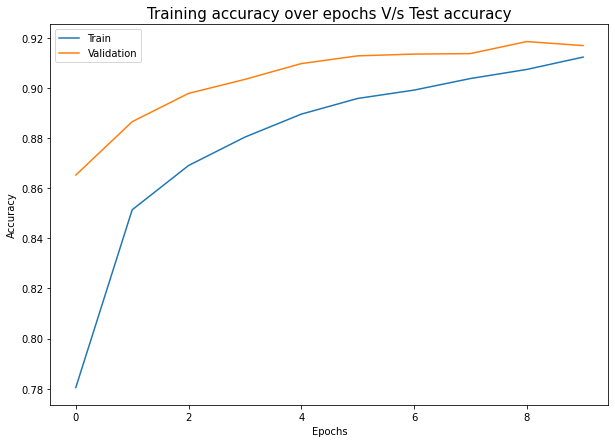

In [109]:
plt.figure(figsize = (10, 7))
plt.plot(CNN.history['accuracy'])
plt.plot(CNN.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy over epochs V/s Test accuracy', fontsize = 15)
plt.legend(['Train','Validation'])


Setup 2 - (2,2)

In [110]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(2,2),
                activation='relu',
                 padding="valid",
                 kernel_initializer="glorot_uniform",
                input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=(2,2),
                 padding="valid",
                 kernel_initializer="glorot_uniform",
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 27, 27, 32)        160       
                                                                 
 conv2d_51 (Conv2D)          (None, 26, 26, 32)        4128      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 dropout_50 (Dropout)        (None, 13, 13, 32)        0         
                                                                 
 flatten_25 (Flatten)        (None, 5408)              0         
                                                                 
 dense_50 (Dense)            (None, 64)                346176    
                                                     

In [111]:
model.compile(loss='categorical_crossentropy',optimizer='adam',
             metrics=['accuracy'])

from keras.callbacks import EarlyStopping
CNN = model.fit(trainX, trainy,
             batch_size = 64,
             epochs = 10,
             verbose = 2,
             validation_data=(testX, testy),
               callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

Epoch 1/10
938/938 - 7s - loss: 0.5964 - accuracy: 0.7900 - val_loss: 0.3574 - val_accuracy: 0.8690 - 7s/epoch - 8ms/step
Epoch 2/10
938/938 - 6s - loss: 0.4021 - accuracy: 0.8587 - val_loss: 0.3079 - val_accuracy: 0.8889 - 6s/epoch - 7ms/step
Epoch 3/10
938/938 - 6s - loss: 0.3531 - accuracy: 0.8740 - val_loss: 0.2871 - val_accuracy: 0.8947 - 6s/epoch - 7ms/step
Epoch 4/10
938/938 - 6s - loss: 0.3241 - accuracy: 0.8850 - val_loss: 0.2805 - val_accuracy: 0.8985 - 6s/epoch - 7ms/step
Epoch 5/10
938/938 - 6s - loss: 0.3061 - accuracy: 0.8898 - val_loss: 0.2647 - val_accuracy: 0.9054 - 6s/epoch - 7ms/step
Epoch 6/10
938/938 - 6s - loss: 0.2842 - accuracy: 0.8962 - val_loss: 0.2557 - val_accuracy: 0.9089 - 6s/epoch - 7ms/step
Epoch 7/10
938/938 - 6s - loss: 0.2709 - accuracy: 0.9022 - val_loss: 0.2452 - val_accuracy: 0.9116 - 6s/epoch - 7ms/step
Epoch 8/10
938/938 - 6s - loss: 0.2589 - accuracy: 0.9049 - val_loss: 0.2432 - val_accuracy: 0.9116 - 6s/epoch - 7ms/step
Epoch 9/10
938/938 - 6s 

In [112]:
score = model.evaluate(testX, testy,verbose=0)
print('loss: ',score[0])
print('accuracy: ',score[1])

loss:  0.2375301718711853
accuracy:  0.9168999791145325


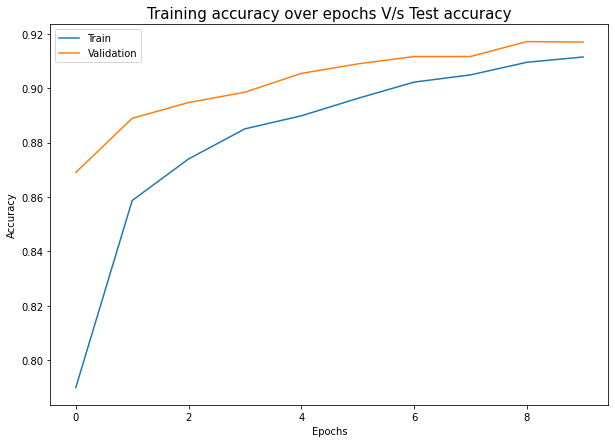

In [113]:
plt.figure(figsize = (10, 7))
plt.plot(CNN.history['accuracy'])
plt.plot(CNN.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy over epochs V/s Test accuracy', fontsize = 15)
plt.legend(['Train','Validation'])


Setup 3 - (4,4)

In [118]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(5,5),
                activation='relu',
                 padding="valid",
                 kernel_initializer="glorot_uniform",
                input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=(5,5),
                 padding="valid",
                 kernel_initializer="glorot_uniform",
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 conv2d_55 (Conv2D)          (None, 20, 20, 32)        25632     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 10, 10, 32)       0         
 g2D)                                                            
                                                                 
 dropout_54 (Dropout)        (None, 10, 10, 32)        0         
                                                                 
 flatten_27 (Flatten)        (None, 3200)              0         
                                                                 
 dense_54 (Dense)            (None, 64)                204864    
                                                     

In [119]:
model.compile(loss='categorical_crossentropy',optimizer='adam',
             metrics=['accuracy'])

from keras.callbacks import EarlyStopping
CNN = model.fit(trainX, trainy,
             batch_size = 64,
             epochs = 10,
             verbose = 2,
             validation_data=(testX, testy),
               callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

Epoch 1/10
938/938 - 8s - loss: 0.6328 - accuracy: 0.7739 - val_loss: 0.3987 - val_accuracy: 0.8546 - 8s/epoch - 8ms/step
Epoch 2/10
938/938 - 6s - loss: 0.4277 - accuracy: 0.8468 - val_loss: 0.3348 - val_accuracy: 0.8794 - 6s/epoch - 7ms/step
Epoch 3/10
938/938 - 7s - loss: 0.3729 - accuracy: 0.8673 - val_loss: 0.3080 - val_accuracy: 0.8878 - 7s/epoch - 7ms/step
Epoch 4/10
938/938 - 6s - loss: 0.3406 - accuracy: 0.8779 - val_loss: 0.2905 - val_accuracy: 0.8962 - 6s/epoch - 7ms/step
Epoch 5/10
938/938 - 6s - loss: 0.3138 - accuracy: 0.8853 - val_loss: 0.2805 - val_accuracy: 0.8995 - 6s/epoch - 7ms/step
Epoch 6/10
938/938 - 7s - loss: 0.2998 - accuracy: 0.8922 - val_loss: 0.2742 - val_accuracy: 0.9025 - 7s/epoch - 7ms/step
Epoch 7/10
938/938 - 6s - loss: 0.2851 - accuracy: 0.8970 - val_loss: 0.2654 - val_accuracy: 0.9051 - 6s/epoch - 7ms/step
Epoch 8/10
938/938 - 7s - loss: 0.2745 - accuracy: 0.9003 - val_loss: 0.2600 - val_accuracy: 0.9065 - 7s/epoch - 7ms/step
Epoch 9/10
938/938 - 7s 

In [120]:
score = model.evaluate(testX, testy,verbose=0)
print('loss: ',score[0])
print('accuracy: ',score[1])

loss:  0.2569301128387451
accuracy:  0.9101999998092651


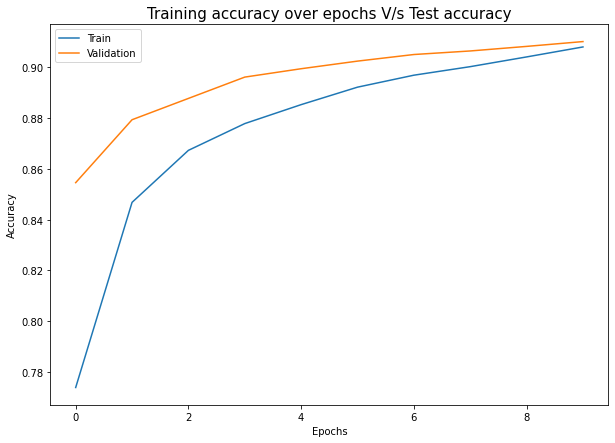

In [121]:
plt.figure(figsize = (10, 7))
plt.plot(CNN.history['accuracy'])
plt.plot(CNN.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy over epochs V/s Test accuracy', fontsize = 15)
plt.legend(['Train','Validation'])


Data Augmentation

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

In [25]:
from keras.datasets import fashion_mnist
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

In [26]:
trainX = trainX.reshape(trainX.shape[0],trainX.shape[1],trainX.shape[2],1)
testX = testX.reshape(testX.shape[0],testX.shape[1],testX.shape[2],1)

In [27]:
trainX = trainX/255
testX = testX/255

In [28]:
trainy = tf.keras.utils.to_categorical(trainy, 10)
testy = tf.keras.utils.to_categorical(testy, 10)

In [13]:
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(28, 28),
  layers.Rescaling(1./255)
])

In [49]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.001),
])

In [59]:
model = tf.keras.Sequential([
  # Add the preprocessing layers you created earlier.
  data_augmentation
  # Rest of your model.
])
model.add(Conv2D(32,kernel_size=(3,3),
                activation='relu',
                 padding="valid",
                 kernel_initializer="glorot_uniform",
                input_shape=(28,28,1)))
model.add(Conv2D(128,kernel_size=(3,3),
                 padding="valid",
                 kernel_initializer="glorot_uniform",
                activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))



In [62]:
model.compile(loss='categorical_crossentropy',optimizer='adam',
             metrics=['accuracy'])

from keras.callbacks import EarlyStopping
CNN = model.fit(trainX, trainy,
             batch_size = 64,
             epochs = 50,
             verbose = 2,
             validation_data=(testX, testy),
               callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

Epoch 1/50
938/938 - 8s - loss: 0.1878 - accuracy: 0.9315 - val_loss: 0.2295 - val_accuracy: 0.9159 - 8s/epoch - 9ms/step
Epoch 2/50
938/938 - 7s - loss: 0.1851 - accuracy: 0.9306 - val_loss: 0.2286 - val_accuracy: 0.9197 - 7s/epoch - 7ms/step
Epoch 3/50
938/938 - 7s - loss: 0.1804 - accuracy: 0.9336 - val_loss: 0.2198 - val_accuracy: 0.9245 - 7s/epoch - 7ms/step
Epoch 4/50
938/938 - 7s - loss: 0.1754 - accuracy: 0.9349 - val_loss: 0.2232 - val_accuracy: 0.9224 - 7s/epoch - 7ms/step
Epoch 5/50
938/938 - 7s - loss: 0.1760 - accuracy: 0.9338 - val_loss: 0.2135 - val_accuracy: 0.9233 - 7s/epoch - 7ms/step
Epoch 6/50
938/938 - 7s - loss: 0.1729 - accuracy: 0.9351 - val_loss: 0.2207 - val_accuracy: 0.9212 - 7s/epoch - 8ms/step
Epoch 7/50
938/938 - 7s - loss: 0.1680 - accuracy: 0.9377 - val_loss: 0.2166 - val_accuracy: 0.9242 - 7s/epoch - 8ms/step
Epoch 8/50
938/938 - 7s - loss: 0.1654 - accuracy: 0.9381 - val_loss: 0.2226 - val_accuracy: 0.9256 - 7s/epoch - 7ms/step


In [63]:
score = model.evaluate(testX, testy,verbose=0)
print('loss: ',score[0])
print('accuracy: ',score[1])

loss:  0.2225782722234726
accuracy:  0.925599992275238


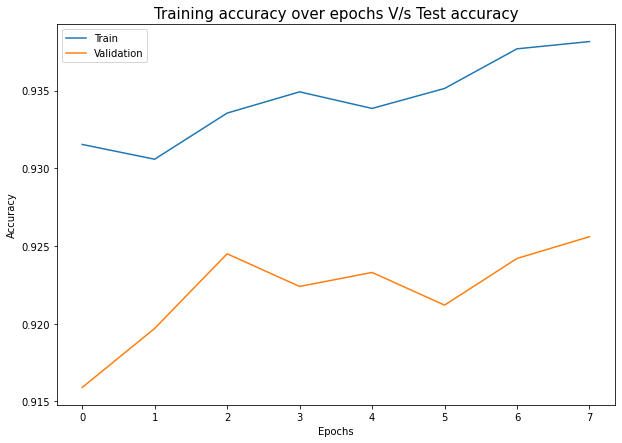

In [64]:
plt.figure(figsize = (10, 7))
plt.plot(CNN.history['accuracy'])
plt.plot(CNN.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy over epochs V/s Test accuracy', fontsize = 15)
plt.legend(['Train','Validation'])
